\newpage

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, scale
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

from scipy import stats

[@misc_chronic_kidney_disease_336]

## 1. Classification Problem Identification:

Define and describe a classification problem based on the dataset.

In [100]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
Y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [101]:
print(X)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

In [102]:
Y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


This dataset contains medical records with labels indicating the presence of chronic kidney disease (CKD). The goal of our classification problem is to create a predictive model that accurately identifies whether a patient has CKD based on a set of features. The purpose of this classification model is to predict chronic kidney disease.

## 2. Variable Transformation:

Implement any transformations chosen or justify the absence of such modifications.

In [103]:
Y["class"] = Y["class"].str.strip()

tra = {'class': {'ckd': 1.0, 'notckd': 0}}

for column, Tra in tra.items():
    Y[column] = Y[column].replace(Tra)

C:\Users\siyin\AppData\Local\Temp\ipykernel_8728\718539806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["class"] = Y["class"].str.strip()
C:\Users\siyin\AppData\Local\Temp\ipykernel_8728\718539806.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y[column] = Y[column].replace(Tra)
C:\Users\siyin\AppData\Local\Temp\ipykernel_8728\718539806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [104]:
class_counts = Y["class"].value_counts()
class_counts

class
1.0    250
0.0    150
Name: count, dtype: int64

In [105]:
data = pd.concat([X, pd.DataFrame(Y, columns=["class"])], axis=1)
print(data)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe 

## 3. Dataset Overview:

Provide a detailed description of the dataset, covering variables, sum-maries, observation counts, data types, and distributions (at least three statements).

In [106]:
data.shape

(400, 25)

(1)  There are 400 observations and 25 features.

In [107]:
data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class    float64
dtype: object

(2)  

There are 15 variables of type ‘float64’ in the dataset which are: ‘age’, 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'class'.

There are 10 variables of type ‘object’ in the dataset which are:  'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia'.

In [108]:
print(data.describe())

              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.884498   
std     50.503006    5.7411

In [109]:
def plot_distributions(data, features):
    num_plots = len(features)
    num_rows = num_plots // 2 + num_plots % 2
    fig, axes = plt.subplots(nrows=num_rows,
                             ncols=2,
                             figsize=(10, 3 * num_rows))
    
    for ax, feature in zip(axes.flatten(), features):
        sns.histplot(data[feature], kde=True, ax=ax)
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

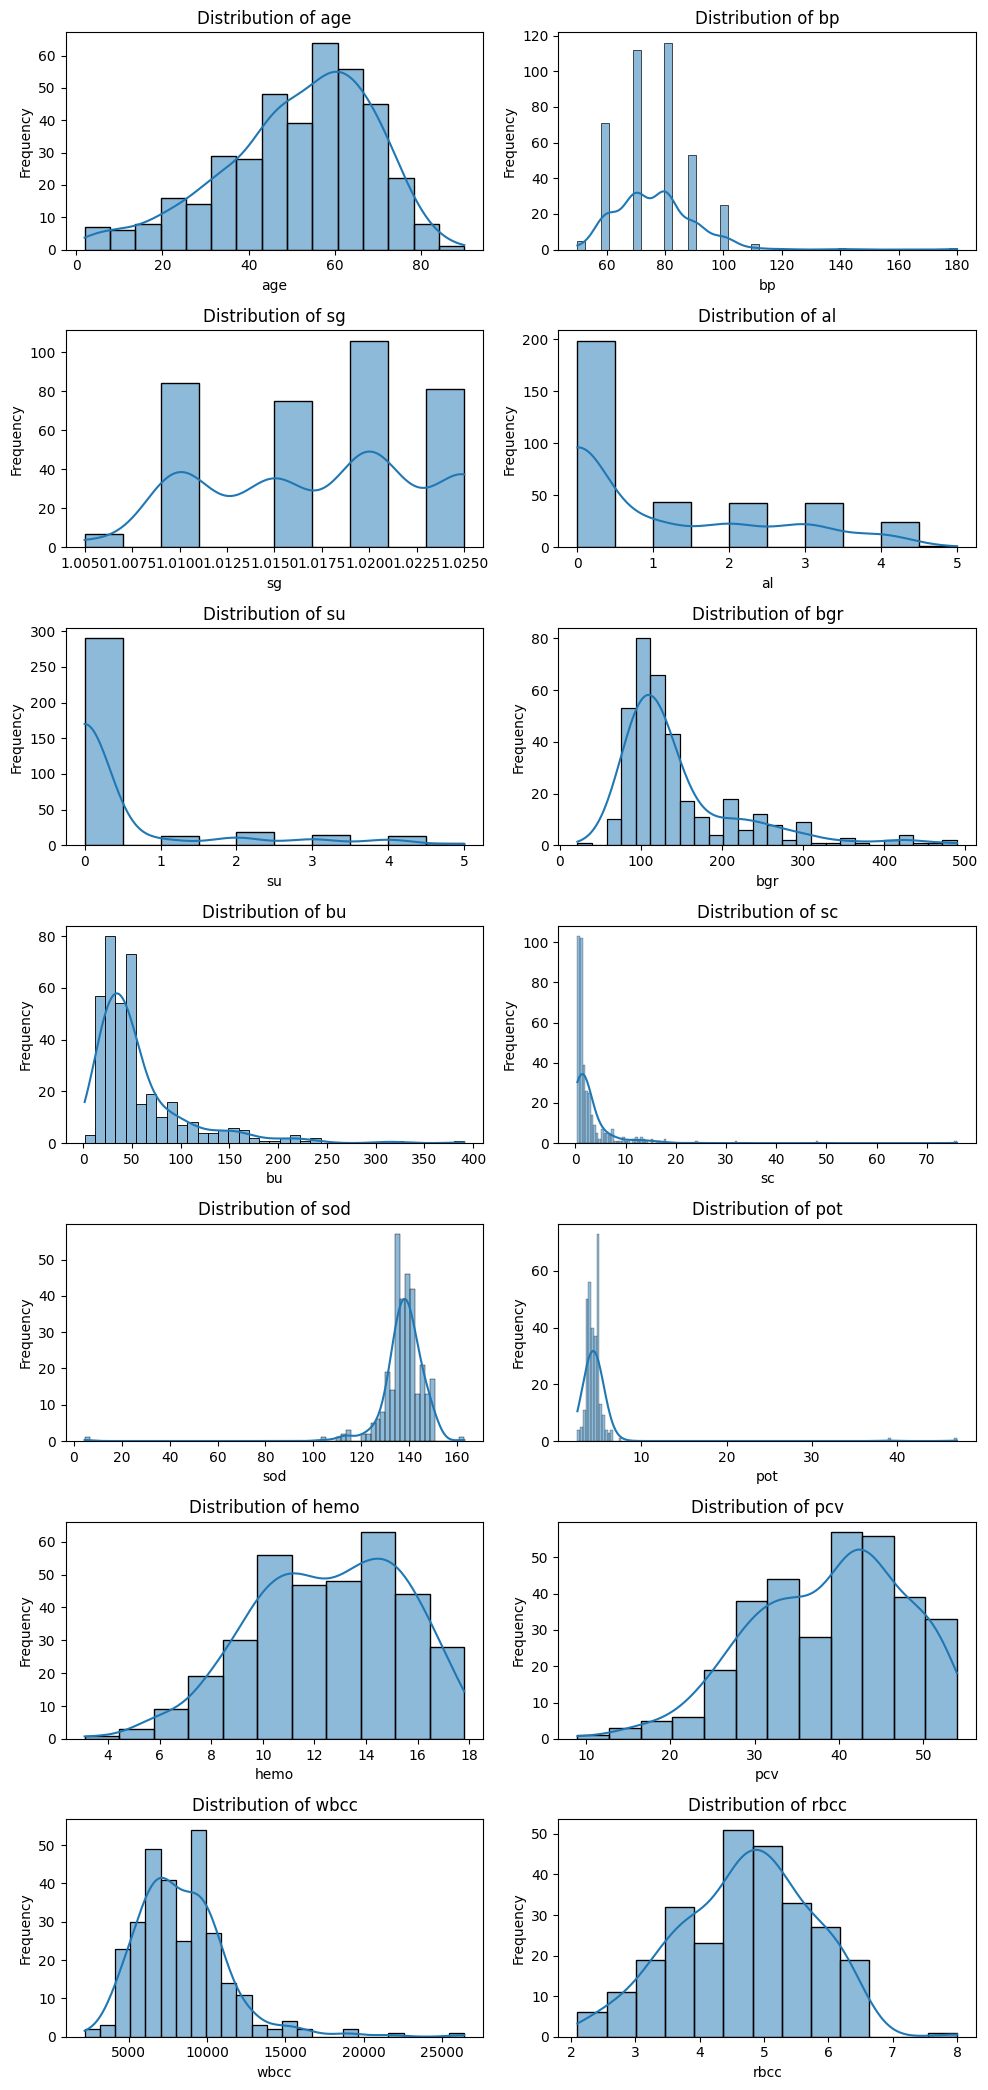

In [110]:
numerical_features = ['age', 'bp', 'sg', 'al', 'su', 
                      'bgr', 'bu', 'sc', 'sod', 'pot',
                      'hemo', 'pcv', 'wbcc', 'rbcc']

plot_distributions(data, numerical_features)

(3)

This data set covers multiple variables, including age(age), blood pressure(bp), specific gravity(sg), albumin(al), sugar(su), blood glucose random (bgr), blood urea(bu), serum creatinine(sc), sodium(sod), potassium(pot), hemoglobin(hemo), packed cell volume(pcv), white blood cell count(wbcc), red blood cell count(rbcc) and the final classification result(class).

In terms of observation distribution, the distribution of age is roughly normal, and the distribution of blood pressure is also relatively close to normal distribution. However, the distribution of random variables such as urine specific gravity and blood sugar may be more complex and may require further exploration and processing. In addition, the final classification results showed that approximately 62.5% of individuals were labeled as having chronic kidney disease, while the remaining 37.5% were labeled as not having chronic kidney disease, indicating that the dataset has a certain degree of class imbalance.

##  4. Association Between Variables:

Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

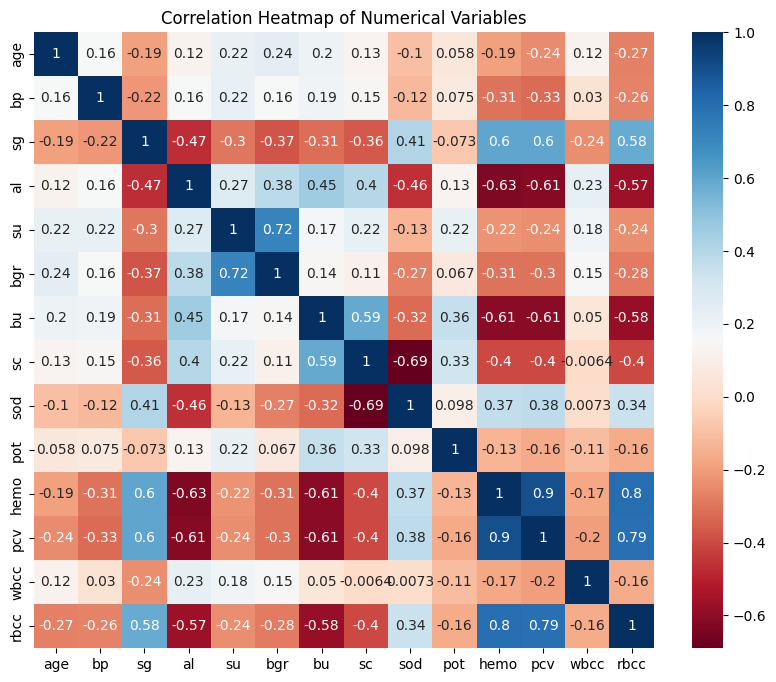

In [111]:
numerical_columns = data.select_dtypes(include=['float64']).drop(columns=['class'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(),
            annot=True,
            cmap='RdBu')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The correlation heatmap displays how variables are related in a dataset, with red indicating positive correlations and blue indicating negative correlations. For example:The positive correlation (0.8) between 'hemo' and 'pcv', which could be expected as these might represent related hematological measurements (hemoglobin and packed cell volume). The negative correlation (-0.69) between 'bgr' (possibly blood glucose level) and 'sc' (possibly serum creatinine), suggesting that as blood glucose level goes up, the serum creatinine level goes down.

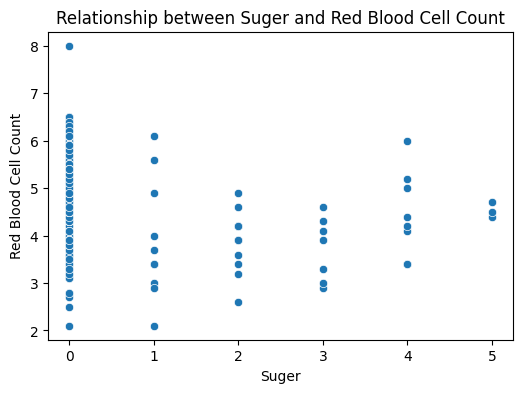

In [112]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='su', y='rbcc', data=data)
plt.title('Relationship between Suger and Red Blood Cell Count')
plt.xlabel('Suger')
plt.ylabel('Red Blood Cell Count')
plt.show()

The scatter plot suggests that there is no visible strong linear relationship between 'Sugar' levels and 'Red Blood Cell Count'. 

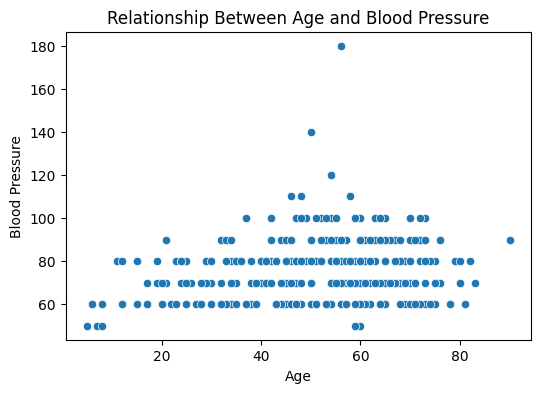

In [113]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='bp', data=data)
plt.title('Relationship Between Age and Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

Visually, the plot does not suggest a strong correlation between age and blood pressure. However, the variability seems to increase with age, and there may be a weak positive trend.There are some outliers (points with blood pressure values above 160 mmHg).

## 5. Missing Value Analysis and Handling:

Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [114]:
missing_values = data.isnull().sum()
percentage = (missing_values / len(data)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage': percentage}).sort_values(by='Percentage',
                                                                    ascending=False)
missing_info

,Missing Values,Percentage
rbc,152,38.00
rbcc,131,32.75
wbcc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


This data set contains a large number of missing values. The number and proportion of missing values are as follows:

The variable with the most missing values is 'rbc', with 152 missing data, accounting for 38.00% of the total data.
Followed by 'rbcc' and 'wbcc', with 131 and 106 missing data respectively, accounting for 32.75% and 26.50% respectively.


'pot' and 'sod' have 88 and 87 missing data, accounting for 22.00% and 21.75% respectively.


'pcv' and 'pc' have 71 and 65 missing data, accounting for 17.75% and 16.25% respectively.


The number and proportion of missing values for other variables ranged from 4.75% to 0.25%.


The 'class' variable has no missing values.

In [115]:
data_drop = data.dropna()
data_drop.shape

(158, 25)

We can see that this data set contains many missing values. If rows or columns containing missing values are deleted, a large proportion of data will be lost. And it may lead to sample bias, thus affecting the reliability of the analysis results. Especially if the missing values are not randomly distributed but are associated with a specific variable or a specific sample, bias may be introduced.

So filling missing values may be a better choice, using the mode method to fill missing values to retain more information and reduce the distortion of the data set.

In [116]:
mode_values = data.mode().iloc[0]
data_filled = data.fillna(mode_values)

# Check
data_filled.isnull().sum().max()

0

##  6. Outlier Analysis:
Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

In [117]:
def outlier_analysis(data, features, threshold=1.5):
    outlier = []
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outlier_list_col=data[(data[feature]<lower_bound)|(data[feature]>upper_bound)].index
        outlier.extend(outlier_list_col)
    
    outlier = list(set(outlier))
    return outlier

In [118]:
outlier = outlier_analysis(data_filled, numerical_columns)

data_outlier = data_filled.loc[outlier]
print(data_outlier)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
1     7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
6    68.0  70.0  1.010  0.0  0.0  normal    normal  notpresent  notpresent   
7    24.0  80.0  1.015  2.0  4.0  normal  abnormal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
374  79.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
382  48.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
386  46.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
388  51.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
391  36.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe 

##  7. Sub-group Analysis:
Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups.

The sub-group analysis must not include the labels (for CKD patients and healthy controls).

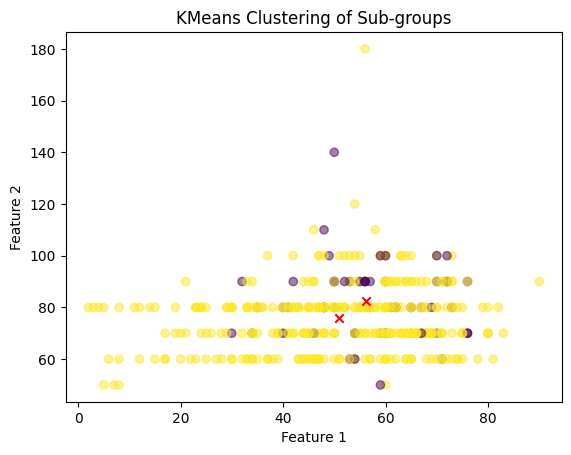

In [119]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


X_numeric = data_filled[['age', 'bp', 'bu', 'sc']]

X_categorical = data_filled[['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
encoder = LabelEncoder()
X_categorical_encoded = X_categorical.apply(encoder.fit_transform)

X_processed = pd.concat([X_numeric, X_categorical_encoded], axis=1)

k = 2

kmeans = KMeans(n_clusters=k, random_state=5)
kmeans.fit(X_processed)

cluster_labels = kmeans.labels_

plt.scatter(X_processed.iloc[:, 0], X_processed.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')  
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering of Sub-groups')
plt.show()


##  8. Data Splitting:


Segregate 30% of the data for testing, using a random seed of 1.

Use the remaining 70% for training and model selection.

In [120]:
x = data_filled.drop('class', axis=1) 
y = data_filled['class']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y)

##  9. Classifier Choices:

Identify the two classifiers you have chosen and justify your selections.

Decision trees and logistic regression are commonly used machine learning algorithms for solving classification problems, such as predicting chronic kidney disease(CKD) from data. Each of them has some advantages and applicable situations:

Advantages of Decision Trees:

(1)  Strong interpretability: The rules generated by the decision tree model are easy to understand and interpret because they can be visually presented as a tree structure, with each node representing a feature and its impact on the goal.

(2)  Adapt to nonlinear relationships: Decision trees are able to handle nonlinear relationships and do not require excessive preprocessing of the data, such as feature scaling.

(3)  Robust to missing values and outliers: Decision trees are able to handle missing values and outliers without having much impact on them.

(4)  Consider multiple features simultaneously: Decision trees can consider multiple features simultaneously and can discover interactions between features.

Advantages of Logistic Gegression:

(1)  Simple and efficient: Logistic regression is a simple and efficient linear model with fast training speed and good scalability for large data sets.

(2)  Probability output: Logistic regression can output the probability that a sample belongs to different categories, not just a hard classification result, which is very useful for risk assessment and uncertainty modeling in certain scenarios.

(3)  Strong applicability to sparse data: When the feature space is large and most features are zero (sparse data), logistic regression can still perform well.

(4)  Strong anti-noise ability: Logistic regression has relatively little impact on noisy data and has a certain degree of robustness.

##  10. Performance Metrics:

Outline the two metrics for comparing the performance of the classifiers.

Accuracy:

The accuracy measures the prediction accuracy of the classifier on the entire data set, that is, the ratio of the number of samples correctly predicted by the classifier to the total number of samples. If a classifier has a high accuracy, it means that it can correctly classify most samples as a whole.

Recall Rate:

The recall rate focuses on the classifier's ability to identify positive examples, that is, the proportion of all actual positive examples that the classifier can correctly predict. A high recall rate means that the classifier can better capture positive examples and minimize the chance of missing real positive examples.

##  11. Feature Selection/Extraction:

Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

##  12. Classifier Comparison:

Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_train_encoded = x_train.copy()
x_test_encode = x_test.copy()

for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train_encoded[col] = label_encoder.fit_transform(x_train[col])

for col in x_test.columns:
     if x_test[col].dtype == 'object':
        x_test_encode[col] = label_encoder.fit_transform(x_test[col])

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encode)

In [122]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(x_train_encoded, y_train)

DecisionTreeClassifier(random_state=1)

In [123]:
LR_model = LogisticRegression(random_state=1)
LR_model.fit(x_train_encoded, y_train)

c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [124]:
#predict
DT_pred = DT_model.predict(x_test_scaled)
LR_pred = LR_model.predict(x_test_scaled)

c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siyin\Desktop\3daa6\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        45
         1.0       0.62      1.00      0.77        75

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.39      0.62      0.48       120


Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        45
         1.0       1.00      0.68      0.81        75

    accuracy                           0.80       120
   macro avg       0.83      0.84      0.80       120
weighted avg       0.87      0.80      0.80       120



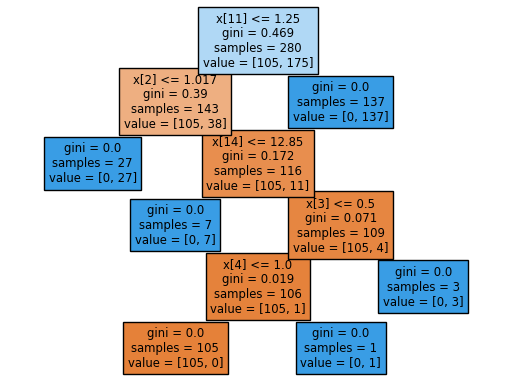

In [125]:
DT_report = classification_report(y_test, DT_pred)
print("Decision Tree Classifier Classification Report:")
print(DT_report)

LR_report = classification_report(y_test, LR_pred)
print("\nLogistic Regression Classifier Classification Report:")
print(LR_report)

plot_tree(DT_model, filled=True)
plt.show()

1. Better performance: The logistic regression model predicts correctly at a much higher rate than the decision tree. It has an accuracy of 80% compared to 62% for the decision tree.

2. Problems with negative categories: The decision tree model was unable to correctly predict any of the negative categories. The logistic regression model performs much better and correctly predicts the negative categories most of the time.

##  13. Interpretable Classifier Insight:

After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

In [126]:
dec_tree = DecisionTreeClassifier(max_depth=30, random_state=1)
dec_tree.fit(x_train_encoded, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

In [127]:
importances = dec_tree.feature_importances_
feature_names = data_filled.columns.tolist()
feature_names.remove('class') 
print("Feature importances:", importances)

Feature importances: [0.         0.         0.27345069 0.04362126 0.01509434 0.
 0.         0.         0.         0.         0.         0.57482517
 0.         0.         0.09300854 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


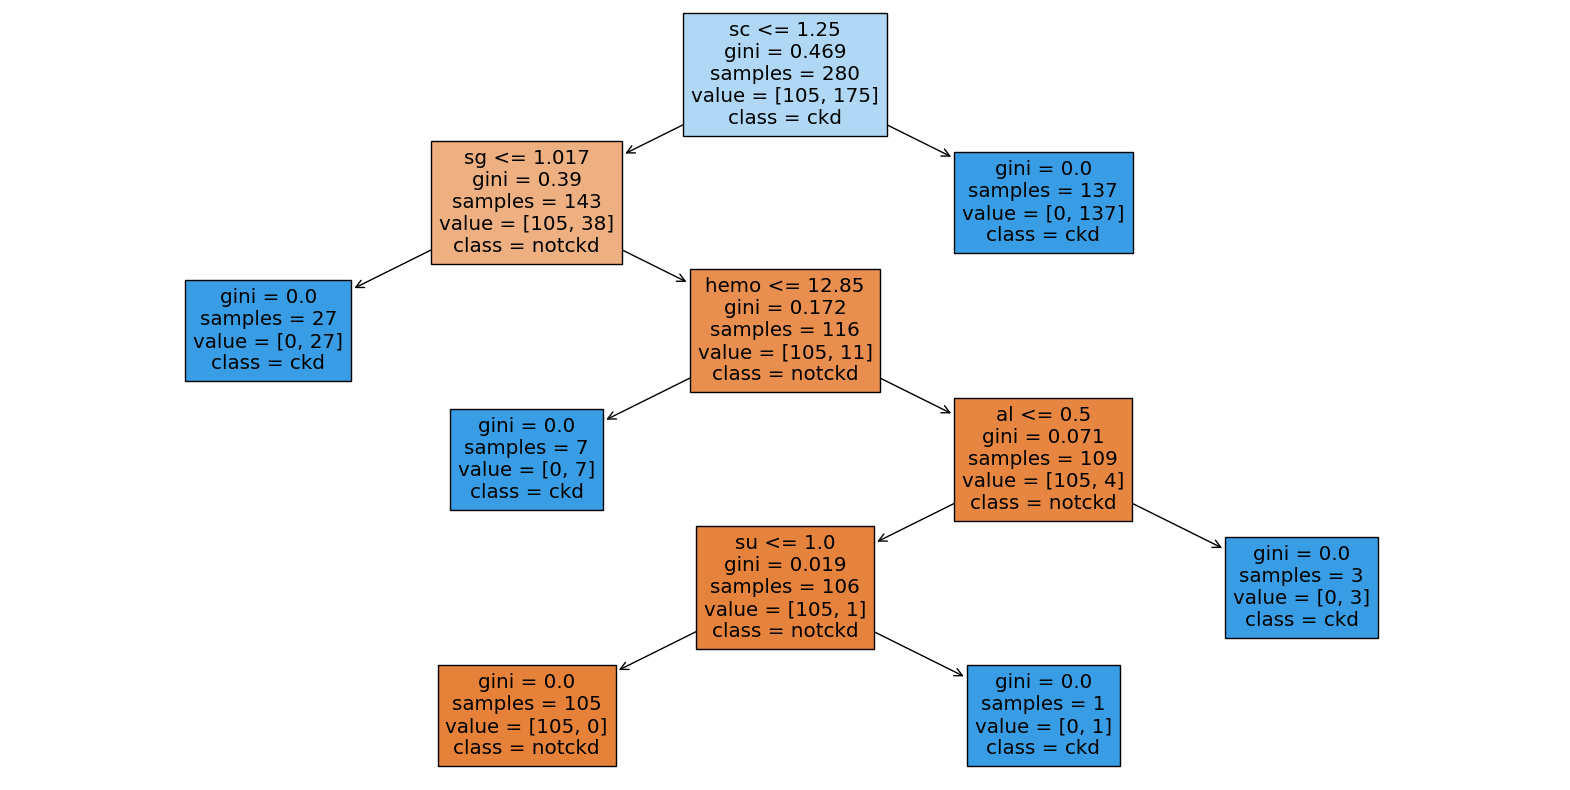

In [128]:
plt.figure(figsize=(20, 10))
plot_tree(dec_tree, filled=True, feature_names=x.columns, class_names=['notckd', 'ckd'])
plt.show()

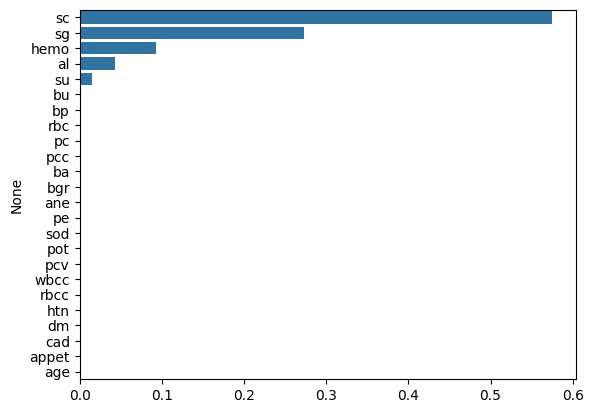

In [129]:
sorted_indices = importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

The bar plot from the Decision Tree Classifier shows that serum creatinine (sc) and specific gravity (sg) are the top predictors for chronic kidney disease, highlighting their crucial roles in kidney function. Elevated serum creatinine levels often indicate reduced kidney filtration, while abnormal specific gravity may reflect issues with urine concentration. Hemoglobin (hemo) also emerges as a key indicator, where lower levels can be associated with kidney-related anemia. These features are essential in understanding and diagnosing CKD.

##  14. [Bonus] Sub-group Improvement Strategy:

If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

##  15. Team Contributions:

Document each team member’s specific contributions related to the questions above.

Yuyang Chen: Q1-4,10-11: code & comment

Yiwen Yang: Q12-14: code & comment

Siying Xu: Q5-9: code & comment , Github upload

##  16. Link to the public GitHub repository.

https://github.com/Amberxuuu22/Stats3da

\newpage

## Reference